## Random initial guesses

### Polynomial function test

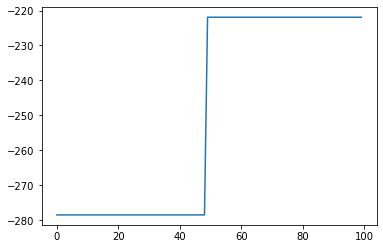

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

def double_well(x, a, b, c, d):
    return a*x**2 + b*x + c*x**4 + d


x = np.linspace(-10, 10, 100)
params = (-10, 4, .1, 0)
# plt.plot(x, double_well(x, *params))

res = minimize(double_well, x0=0, args=params)
# print(res)

N = 100
min = np.array([])
for i in range(N):
    x = np.random.uniform(-10, 10)
    res = minimize(double_well, x0=x, args=params)
    min = np.append(min, res.fun)

plt.plot(np.sort(min))

### 4 site

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([4], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
c = np.zeros(Ntime)
for i in range(Ntime):
    __, __, info = G.equalzie('Uvt', random=True, callback=True)
    c[i] = info['ctot'][-1]

Initial trap depths: [1.04679623 1.06982687]
Initial trap centers:
[[-1.45093631  0.        ]
 [-0.48886328  0.        ]]
i=50	c=[0.03902523 0.01154433 0.01042806]	c_i=0.06099761885349545	c_i//2-c_i=0.006414662084812776
i=100	c=[3.98414894e-02 4.04823670e-05 1.18697858e-02]	c_i=0.05175175754697037	c_i//2-c_i=0.0014314298556784288
i=150	c=[3.34510341e-02 4.40689547e-03 2.64777562e-05]	c_i=0.037884407298568554	c_i//2-c_i=0.013999430970558696
i=200	c=[3.34354050e-02 4.43010518e-03 2.36351382e-06]	c_i=0.03786787367600962	c_i//2-c_i=0.013401850622737903
i=250	c=[3.33867057e-02 4.50207977e-03 9.20512113e-05]	c_i=0.03798083669277415	c_i//2-c_i=0.0003346218318752772
i=300	c=[0.03345117 0.00944952 0.00031265]	c_i=0.04321334149080629	c_i//2-c_i=-0.005185926530590107
i=350	c=[3.34943125e-02 1.62299151e-04 4.84248391e-05]	c_i=0.03370503651547831	c_i//2-c_i=0.005275635424498076
i=400	c=[3.35026864e-02 1.16154396e-05 3.00936177e-05]	c_i=0.03354439543464425	c_i//2-c_i=0.004320916838813832
i=450	c=[3.

(0.03, 0.04)

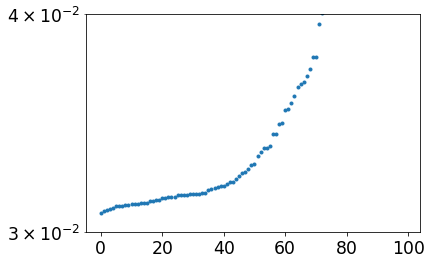

In [ ]:
cs = np.sort(c)
plt.plot(cs, '.')
plt.yscale('log')
plt.ylim(0.03, 0.05)

### 3 site

In [1]:
import numpy as np
from Hubbard.plot import *

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
G.eq_label = 'eq'
Ntime = 100
v0, bounds = G.init_guess()
v0_len = v0.shape[0]
c = np.zeros((Ntime, 1 + 2 * v0_len))
for i in range(Ntime):
    __, __, info = G.equalzie('UTv', random=True, callback=True)
    c[i, -1] = info['ctot'][-1]
    c[i, :v0_len] = info['x'][0]
    c[i, v0_len:-1] = info['x'][-1]


ImportError: cannot import name 'autograd' from 'torch' (unknown location)

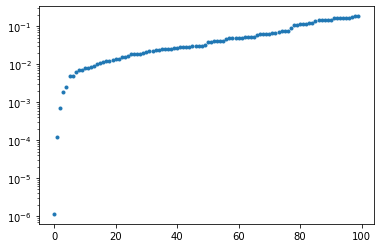

In [ ]:
cs = np.sort(c[:, -1])
plt.plot(cs, '.')
plt.yscale('log')
# plt.ylim(0.03, 0.05)

In [ ]:
cidx = np.argmin(c[:, -1])
c[cidx, :]

array([ 1.06133072e+00,  1.02158793e+00, -1.00162703e+00,  0.00000000e+00,
        4.98240852e-02,  0.00000000e+00,  1.13119257e-06])